---
<a name='title'></a>
# **<font color="Navy"> Física del clima </font>**
## **<font color="RoyalBlue"> Termodinámica </font>**
### **<font color="DodgerBlue"> Notebook 2: Termodinámica húmeda y la aproximación de Bolton </font>**
### Escuela Nacional de Ciencias de la Tierra
#### **<font color="Forestgreen"> Semestre 2026-I  </font>**


---


### **<font color="ForestGreen">  La ecuación de Clausius Clapeyron </font>**

La ecuación de Clausius-Clapeyron describe la relación entre la presión de vapor y la temperatura de una sustancia, revelando cómo cambia la presión de vapor con la temperatura en un sistema termodinámico, lo que es fundamental para comprender los procesos de cambio de fase, como la evaporación y la condensación.


En particular trabajaremos con la siguiente versión de CC, que se utiliza mucho para la transición de fase de condensación-evaporación de un material condensable como el agua. 

\begin{align}
\frac{1}{e_s} \frac{d e_s}{dT}  = \frac{L}{R_v T^2}
\end{align}

donde T es la temperatura en $K$, $e_s$ es la presión de saturación de vapor $[Pa]$, $L$ es el calor latente de vaporización que típicamente tiene valores de 2260 kJ K$^{-1}$ y $R_v$ es la constante de los gases para la mezcla 

Podemos resolverla con las siguientes condiciones iniciales.
$e_s(T=273.15)=6.112$ hPa o 611.2 Pa.

Uno puede resolver esta ecuación para ciertas condiciones y obtener como resultado:

\begin{align}
e_s(T)=e_{s,0}e^{\frac{L}{R_v}(\frac{1}{T_0}-\frac{1}{T})}
\end{align}

donde $T_0$ es la temperatura inicial, y $e_{s,0}$ una presión de saturación de vapor. Típicamente, se usa la temperatura del punto de fusión $T_0=273.15$ K y una presión de saturación de vapor de 611 Pa.

Además, existe una aproximación muy utilizada, que no requiere de conocimiento de la condición inicial, conocida como la aproximación de [Bolton](https://journals.ametsoc.org/view/journals/mwre/108/7/1520-0493_1980_108_1046_tcoept_2_0_co_2.xml?tab_body=fulltext-display) que se puede escribir así:

\begin{align}
e_s(T)=6.112 e^{\frac{17.67T}{243.5+T}}
\end{align}

donde $T$ es la temperatura en grados Celsius y el resultado está en hPa. Las unidades son **muy importantes**.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)

En las siguientes dos celdas se definen la solución de Bolton y la solución analítica.

In [2]:
def bolton(T):
    # requiere T en degC
    a=611.2
    # regresa la presion de vapor en hPa
    return a*np.exp(T*17.67/(T+243.5))
bolton(0)

611.2

In [3]:
def es_analytic(es0,T0,T):
    Rv= 461.5 # J kg K-1
    L= 2.260e6
    return es0*np.exp((L/Rv)*(1/T0-1/T))

Habiendo escrito nuestras soluciones analíticas, vamos a resolver la ecuación de manera numérica. Si la escribimos con diferencias finitas hacia atrás, la ecuación de CC queda como:

\begin{align}
\frac{e_{s,i}-e_{s,i-1}}{h_T} =  \frac{L e_{s,i-1}}{R_vT^2}
\end{align}

donde $h_T$ es la resolución de la variable temperatura con la que vamos a resolver la ecuación. 

En este caso, vamos a resolver la ecuación entre 0 y 35 grados Celsius.

Primero calculamos nuestras soluciones analíticas para estos casos.

In [4]:
## condiciones iniciales, T en K y es0 en Pa.
T0=273.15
es0=611
# definimos h
dT=0.02
# vector donde vamos a resolver 
Tvec=np.arange(T0,T0+35,dT)
psat_sol=es_analytic(es0,T0,Tvec)
# pasamos la temperatura a C, porque asi lo escribio Bolton
bolton_sol=bolton(Tvec-273.15)

In [5]:
# Condiciones frontera
es0 = 611.12 # Valor inicial de es0
# cada cuantos K voy a resolver la ecuacion diferencial
dT = 0.02
Rv= 461.5 # J kg K-1
L= 2.260e6

# iniciamos los arreglos T (ahora en grados C) y es
T_values = np.arange(0, 35, dT)
es_values_back = np.zeros(len(T_values))

# iniciamos la solución
es_values_back[0] = es0

# Esquema de diferencias finitas para ODE, hacia atrás

for n in range(1,len(T_values)):
    es_values_back[n] = es_values_back[n-1] + dT * L *es_values_back[n-1]/ (Rv*((T_values[n-1]+273.15)**2))
#print(es_values)

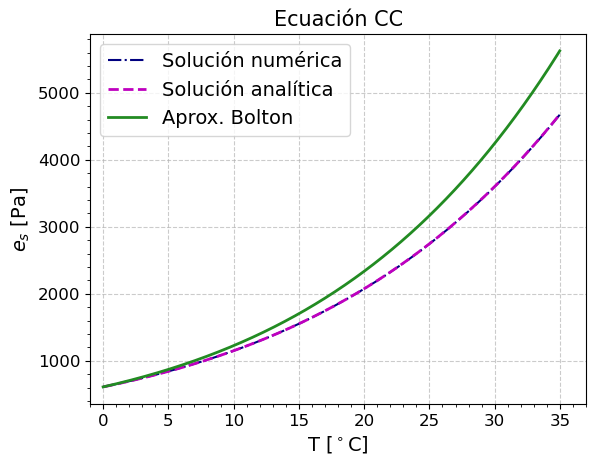

In [6]:
# Graficamos
plt.plot(T_values,es_values_back,c='navy',label='Solución numérica',linestyle='-.')
plt.plot(T_values,psat_sol,label='Solución analítica',linewidth=2,c='m',linestyle='--')
plt.plot(T_values,bolton_sol,label='Aprox. Bolton',linewidth=2,c='forestgreen',linestyle='-')
plt.legend(fancybox=True,fontsize=14)
lineplot_setup(-1,37,xlab='T [$^\circ$C]',ylab='$e_s$ [Pa]',title='Ecuación CC')

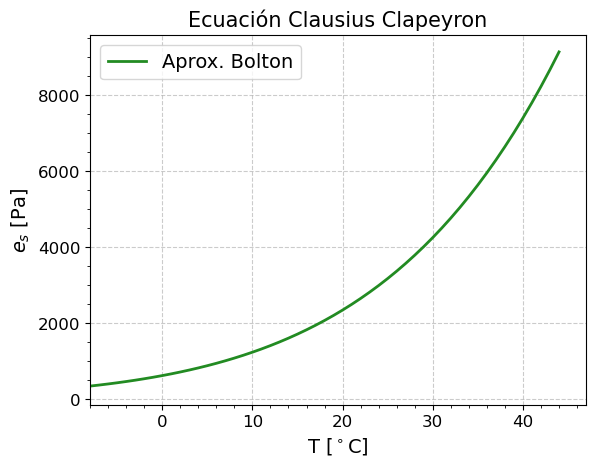

In [7]:
plt.plot(np.arange(-10,45),bolton(np.arange(-10,45)),label='Aprox. Bolton',linewidth=2,c='forestgreen',linestyle='-')
plt.legend(fancybox=True,fontsize=14)
lineplot_setup(-8,47,xlab='T [$^\circ$C]',ylab='$e_s$ [Pa]',title='Ecuación Clausius Clapeyron')

In [8]:
import seaborn as sns

<font color="ForestGreen"> Procesos adiabáticos secos </font>

Los procesos adiabáticos son fundamentales para comprender la dinámica atmosférica. En un proceso adiabático, no hay intercambio de calor entre el sistema y su entorno, lo que significa que los cambios de temperatura se deben únicamente a la compresión o expansión del aire debido a cambios de presión.
Para aire seco, la relación entre temperatura y presión durante un proceso adiabático está descrita por la ecuación de Poisson:
\begin{align}
\frac{T}{T_0} = \left(\frac{P}{P_0}\right)^{\kappa}
\end{align}
donde:

donde:

- $T$ es la temperatura a la presión $P$ [K]
- $T_0$ es la temperatura de referencia a la presión $P_0$ [K]
- $\kappa = \frac{R}{C_p}$ es el exponente de Poisson (≈ 0.286 para aire seco).


El gradiente adiabático seco (lapse rate) es aproximadamente 9.8°C/km, lo que significa que una parcela de aire seco se enfría esta cantidad por cada kilómetro de ascenso.

In [18]:
def calculate_dry_adiabat(T0, P):
    """ Calculate temperature at given pressures for dry adiabats starting from T0 at 1000 hPa. """
    # Constants
    Cp = 1004  # Specific heat at constant pressure for air [J/(kg*K)]
    R = 287    # Gas constant for dry air [J/(kg*K)]
    P0 = 1000  # Reference pressure [hPa]

    # Calculate temperature at each pressure level
    T = T0 * (P / (P0))**(R/Cp)
    return T



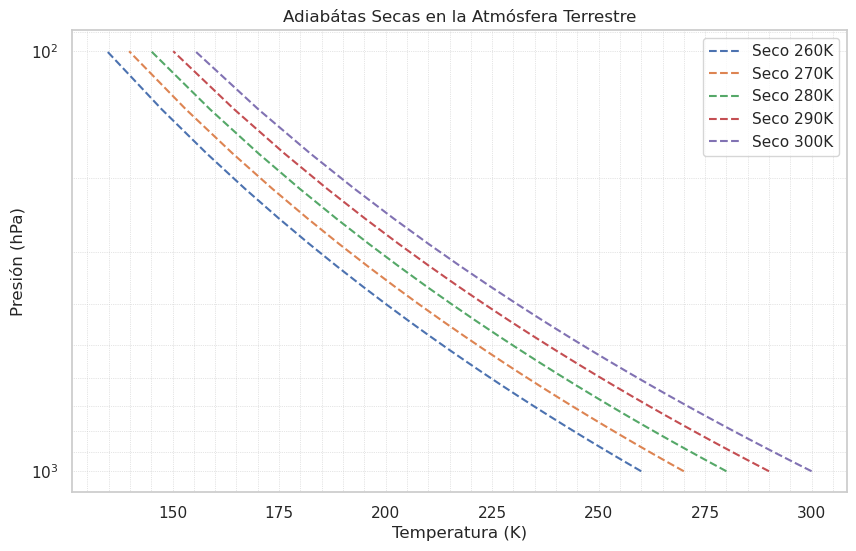

In [23]:
# Pressure levels from 1000 to 100 hPa
P = np.linspace(1000, 100, 25)

# Temperatures for dry adiabats
T0_dry = np.arange(260, 301, 10)  # Starting temperatures from 250K to 300K
dry_adiabats = [calculate_dry_adiabat(T0, P) for T0 in T0_dry]

# Setting up the plot with seaborn styling
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot dry adiabats
for i, T in enumerate(dry_adiabats):
    plt.plot(T, P, label=f'Seco {T0_dry[i]}K', linestyle='--')

plt.gca().invert_yaxis()  # Invert y axis to show pressure decreasing with height
plt.xlabel('Temperatura (K)')
plt.ylabel('Presión (hPa)')
plt.title('Adiabátas Secas en la Atmósfera Terrestre')
# eje logaritmico porque si no, no se ve bonito
plt.gca().set_yscale('log')
plt.legend()
plt.minorticks_on()
plt.grid(True, which='both', linestyle=':', linewidth='0.5')

<font color="ForestGreen"> Procesos adiabáticos húmedos (saturados) </font>
Cuando el aire contiene vapor de agua y alcanza la saturación, los procesos se vuelven más complejos debido a la liberación de calor latente durante la condensación. En este caso, el gradiente de temperatura es menor que el seco, típicamente entre 4-6°C/km.
Para calcular las adiabáticas húmedas, debemos considerar:

La presión de vapor de saturación usando la aproximación de Bolton:
\begin{align}
e_s(T) = 6.112 \exp\left(\frac{17.67T_c}{243.5 + T_c}\right)
\end{align}

que usamos al principio del notebook. La razón de mezcla de saturación:
\begin{align}
q_s = \frac{M_w}{M_a} \cdot \frac{e_s}{P}
\end{align}

donde $Mw=18.015$ g/mol y $M_a = 28.97$ g/mol son las masas molares del vapor de agua y aire seco, respectivamente.

El gradiente adiabático saturado modificado:
\begin{align}
\Gamma_s = \frac{R_d}{C_p} \cdot \frac{1 + \frac{L q_s}{R_d T}}{1 + \frac{L^2 q_s}{C_p R_v T^2}}
\end{align}

donde:

$L= 2.26 \times 10^6 $ J/kg es el calor latente de vaporización, $R_v = 461.5$ J/(kg·K) es la constante de gas para el vapor de agua.


In [30]:
def saturation_vapor_pressure(T):
    """ Approximate saturation vapor pressure using Clausius-Clapeyron. """
    E0 = 6.11  # hPa, base saturation vapor pressure at T0
    T0 = 273.15  # K, base temperature
    L = 2260e3  # J/kg, latent heat of vaporization
    Rv = 461.5  # J/(kg*K), gas constant for water vapor
    return E0 * np.exp((L/Rv) * (1/T0 - 1/T))

def moist_adiabat(T0, p):
    Rd = 287.0  # J/(kg*K), gas constant for dry air
    Rc = 520.0  # J/(kg*K), gas constant for water vapor
    Cp = 1004   # J/(kg*K), specific heat at constant pressure for air
    L = 2260e3  # J/kg, latent heat of vaporization
    Ma = 28.97  # g/mol, molar mass of dry air
    Mc = 18.015 # g/mol, molar mass of water vapor

    T = np.zeros_like(p)
    T[0] = T0  # Initialize surface temperature in Kelvin

    # Compute temperature profile using the provided lapse rate formula
    for i in range(1, len(p)):
        es = saturation_vapor_pressure(T[i-1])
        q = (Mc / Ma) * (es / p[i-1])
        lapse_rate = (Rd / Cp) * ((1 + (L * q / (Rd * T[i-1]))) / (1 + (L**2 * q / (Cp * Rc * T[i-1]**2))))
        dlnP = np.log(p[i] / p[i-1])
        dlnT = lapse_rate * dlnP
        T[i] = T[i-1] * np.exp(dlnT)

    return T

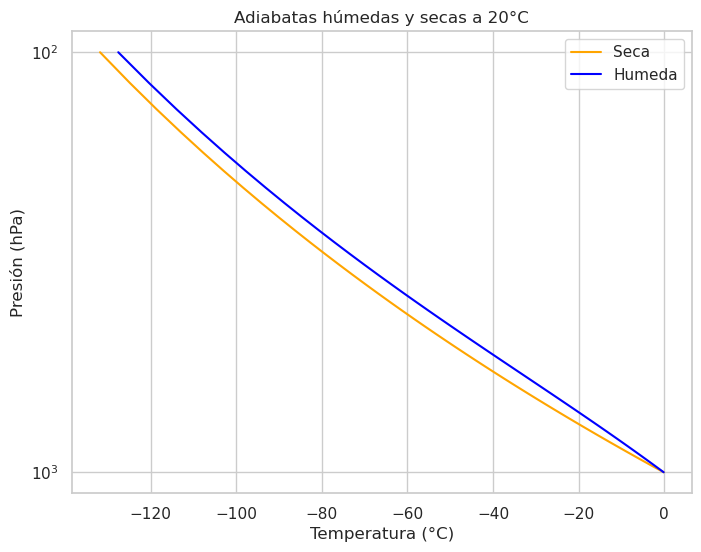

In [47]:
# Pressure levels from 1000 to 100 hPa
p = np.linspace(1000, 100, 50)

# Initial temperature at sea level
T0 = 273  # Celsius

# Calculate adiabats
T_dry = calculate_dry_adiabat(T0, p)
T_moist = moist_adiabat(T0, p)



# Plotting
plt.figure(figsize=(8, 6))
plt.plot(T_dry-273.15, p, label='Seca', color='orange')
plt.plot(T_moist-273.15, p, label='Humeda', color='blue')
plt.gca().invert_yaxis()  # Invert y-axis to align with atmospheric pressure
plt.gca().set_yscale('log')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Presión (hPa)')
plt.minorticks_on()
plt.title('Adiabatas húmedas y secas a 20°C')
plt.legend()
plt.grid(True)


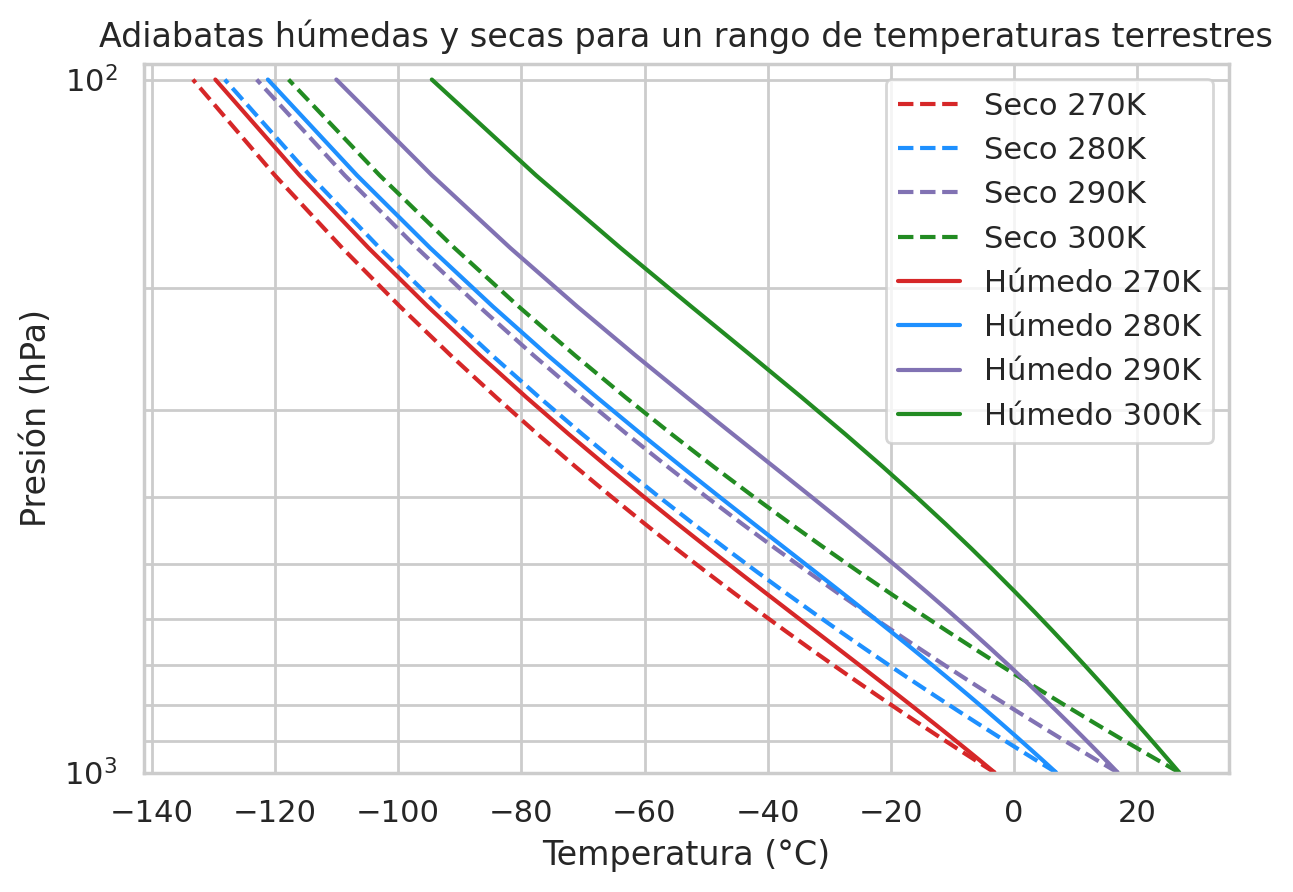

In [45]:
# Pressure levels from 1000 hPa to 100 hPa
p = np.linspace(1000, 100, 50)

# Initial surface temperature
T0 = 285  # Kelvin


# Temperatures for dry adiabats
T0_dry = np.arange(270, 301, 10)  # Starting temperatures from 250K to 300K
dry_adiabats = [calculate_dry_adiabat(T0, P) for T0 in T0_dry]


# Temperatures for moist adiabats
T0_moist = np.arange(270, 301, 10)  

moist_adiabats = [moist_adiabat(T0, P) for T0 in T0_dry]


colors=['tab:red','dodgerblue','m','forestgreen']
plt.figure(figsize=(7, 4.6),dpi=200)

# Plot dry adiabats
for i, T in enumerate(dry_adiabats):
    plt.plot(T-273.15, P, label=f'Seco {T0_dry[i]}K', c=colors[i],linestyle='--',linewidth=1.5)

for i, T in enumerate(moist_adiabats):
    plt.plot(T-273.15, P, label=f'Húmedo {T0_moist[i]}K',c=colors[i])

plt.gca().invert_yaxis()  # Invert y-axis to align with atmospheric pressure
plt.xlabel('Temperatura (°C)')
plt.ylabel('Presión (hPa)')
plt.title('Adiabatas húmedas y secas para un rango de temperaturas terrestres')
plt.gca().set_yscale('log')
plt.yticks(np.arange(100,1001,100))
plt.minorticks_on()
plt.ylim([1000,95])

plt.legend()
plt.grid(True)

## <font color="DarkSlateBlue"> Resumen </font>

En este notebook exploramos los procesos adiabáticos que gobiernan el comportamiento del aire en la atmósfera. Vimos que el aire seco sigue un gradiente simple de ~10°C/km, mientras que el aire saturado tiene un comportamiento más complejo debido a la condensación del vapor de agua.

Las diferencias entre ambos procesos son cruciales para entender por qué algunas regiones son más propensas a la convección que otras, y por qué la formación de nubes puede ser tan variable. La aproximación de Bolton nos permite calcular eficientemente la presión de vapor de saturación sin resolver numéricamente la ecuación de Clausius-Clapeyron completa.

Los diagramas termodinámicos que construimos son herramientas fundamentales en meteorología operacional, donde se usan diariamente para analizar sondeos atmosféricos y hacer pronósticos.

### <font color="Crimson"> Preguntas para reflexionar </font>

- ¿Por qué las montañas "crean" su propio clima? Piensa en lo que le pasa al aire cuando es forzado a subir por una ladera.

- ¿Qué pasaría si no existiera el vapor de agua en la atmósfera? ¿Cómo cambiaría la estabilidad atmosférica?
En ciudades muy secas como la CDMX durante la temporada seca, ¿esperarías más o menos turbulencia que en zonas húmedas como Veracruz?

- ¿Por qué crees que los globos aerostáticos se elevan más fácilmente en las mañanas que al mediodía?
Si tuvieras que diseñar un experimento para medir directamente el gradiente adiabático seco, ¿qué necesitarías?